In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#1 CatFACT
CatFACT = requests.get("https://catfact.ninja/fact")
txt = CatFACT.json()
today_fact = txt["fact"]
print("Random Cat Fact : ", today_fact)

Random Cat Fact :  Among many other diseases, cats can suffer from anorexia, senility, feline AIDS and acne.


In [11]:
txt

{'activity': 'Volunteer at your local food pantry',
 'type': 'charity',
 'participants': 1,
 'price': 0,
 'link': '',
 'key': '1878070',
 'accessibility': 0.1}

[Text(0, 0, '44991.2'), Text(0, 0, '32912.2'), Text(0, 0, '38417.9')]

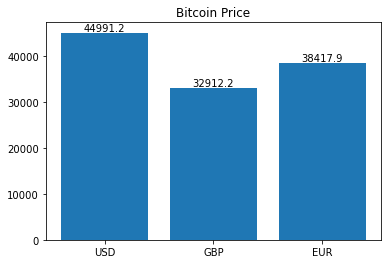

In [8]:
#2 COINPRICE
COINPRICE_TABLE = pd.DataFrame([])
COINPRICE = requests.get("https://api.coindesk.com/v1/bpi/currentprice.json")
txt = COINPRICE.json()
COINPRICE_TABLE = pd.DataFrame(txt["bpi"])
#cleaning
COINPRICE_TABLE = COINPRICE_TABLE.drop('symbol')
COINPRICE_TABLE_Trans = COINPRICE_TABLE.T

label = COINPRICE_TABLE_Trans['code']
height = COINPRICE_TABLE_Trans['rate_float']

fig, ax = plt.subplots()
ax.set_title('Bitcoin Price')
ax.bar(label, height)
ax.bar_label(ax.containers[0])

In [16]:
#3 Bored
boredapi = requests.get("https://www.boredapi.com/api/activity/")
txt = boredapi.json()
Random_Activity = txt["activity"]
Type_Activity = txt["type"]
print(Type_Activity,"activity :", Random_Activity)

relaxation activity : Start a daily journal


In [21]:
#4 Genderize
def getGenders(names):
    url = ""
    cnt = 0
    if not isinstance(names,list):
        names = [names,]

    for name in names:
        if url == "":
            url = "name[0]=" + name
        else:
            cnt += 1
            url = url + "&name[" + str(cnt) + "]=" + name


    req = requests.get("https://api.genderize.io?" + url)
    results = json.loads(req.text)

    retrn = []
    for result in results:
        if result["gender"] is not None:
            retrn.append((result["name"],result["gender"], result["probability"]))
        else:
            retrn.append((u'None',u'0.0'))
    return retrn

Gender_predict_record = pd.DataFrame(getGenders(["Natchanon","Deepali","Paskorn","Ferdin","Panada", "Sun", "Pop"]))
Gender_predict_record.rename(columns={
        0: 'Name', 
        1: 'Gender_Prediction',
        2: 'Probability'
    }, inplace=True)
Gender_predict_record

,Name,Gender_Prediction,Probability
0,Natchanon,male,0.93
1,Deepali,female,0.97
2,Paskorn,male,0.83
3,Ferdin,male,0.96
4,Panada,female,0.85
5,Sun,male,0.52
6,Pop,male,0.65


In [24]:
#5 USA POPULATION DATA
USAPP = requests.get("https://datausa.io/api/data?drilldowns=Nation&measures=Population")
txt = USAPP.json()
Population_USA_table = pd.DataFrame(txt["data"])
Population_USA_table = Population_USA_table.sort_values(['Year'], ascending=[1])
Population_USA_table

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
6,01000US,United States,2013,2013,316128839,united-states
5,01000US,United States,2014,2014,318857056,united-states
4,01000US,United States,2015,2015,321418821,united-states
3,01000US,United States,2016,2016,323127515,united-states
2,01000US,United States,2017,2017,325719178,united-states
1,01000US,United States,2018,2018,327167439,united-states
0,01000US,United States,2019,2019,328239523,united-states


<AxesSubplot:title={'center':'Population of USA 2013 to 2019'}, xlabel='Year'>

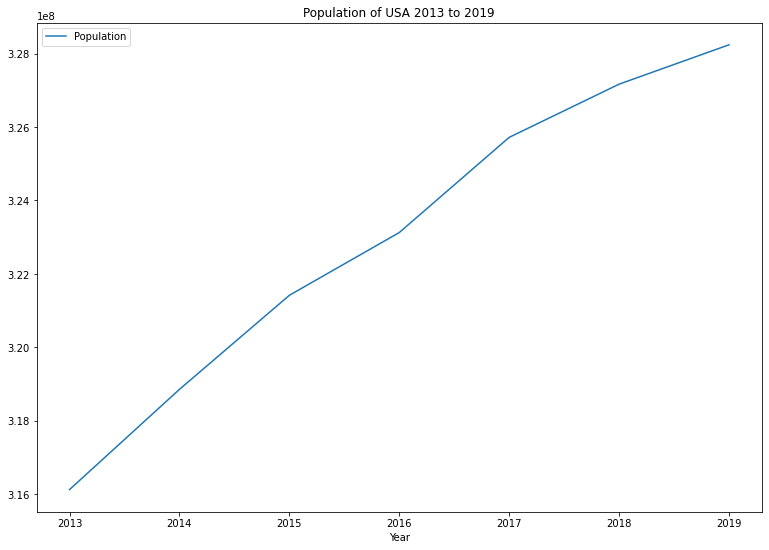

In [25]:
Population_USA_table.plot(title='Population of USA 2013 to 2019',x='Year', y='Population',figsize=(13,9))